In [1]:
# Installation
# ! pip install librosa soundfile numpy sklearn pyaudio

In [2]:
import pandas as pd
import numpy as np
import re
import librosa
import librosa.display
import seaborn as sns
import soundfile as sf
import os, glob, pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [53]:
import IPython.display as ipd

RAVEDESS DATA

In [3]:
#Checking the data 

file_path = "../SER/SER-Ravdess-data"

file_directory=os.listdir(file_path)
print('RAVEDESS DATA')
print(file_directory)


RAVEDESS DATA
['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [4]:
emotion_list=[]
path_list =[]
Gender = []

for directory in file_directory:
    actor = os.listdir(file_path + '/' + directory)
    for file in actor:
        part = file.split('.')[0].split('-')[2]
        emotion_list.append(int(part))
        gender_id = file.split('.')[0].split('-')[6]
        gender_id = int(gender_id)
        if gender_id%2 == 0:
            Gender.append('female')
        else:
            Gender.append('male')
            
        
        path_list.append(file_path + '/' + directory + '/' + file)

# dataframe for emotion of files
Ravdess_df = pd.DataFrame({'Emotions':emotion_list, 'Gender':Gender,'Path':path_list})
Ravdess_df.Emotions.replace({1:'calm', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df['Emotion'] =Ravdess_df['Gender'] + '_'+ Ravdess_df['Emotions']
Ravdess_df.drop(['Emotions','Gender'],axis=1,inplace=True)
Ravdess_df.sample(5)

    

,Path,Emotion
1008,../SER/SER-Ravdess-data/Actor_17/03-01-07-02-0...,male_disgust
1367,../SER/SER-Ravdess-data/Actor_23/03-01-07-01-0...,male_disgust
1163,../SER/SER-Ravdess-data/Actor_20/03-01-04-01-0...,female_sad
1164,../SER/SER-Ravdess-data/Actor_20/03-01-04-02-0...,female_sad
2,../SER/SER-Ravdess-data/Actor_01/03-01-01-01-0...,male_calm


In [5]:
Ravdess_df['Emotion'] .value_counts()

male_calm          144
female_calm        144
male_happy          96
male_sad            96
male_angry          96
male_fear           96
male_disgust        96
male_surprise       96
female_happy        96
female_sad          96
female_angry        96
female_fear         96
female_disgust      96
female_surprise     96
Name: Emotion, dtype: int64

SAVEE DATA

In [6]:
SAVEE_path = "../SER/SAVEE"
savee_directory=os.listdir(SAVEE_path)

In [26]:
SAVEE_emotion=[]
path_SAVEE =[]

for files in savee_directory:
    path_SAVEE.append(SAVEE_path + files )
    
    splitted = files.split('_')[1].split('.')[0]
    splitted = re.findall(r'(\w+?)(\d+)',splitted)[0][0]
    if splitted == 'a':
        SAVEE_emotion.append('male_angry')
    elif splitted == 'd':
        SAVEE_emotion.append('male_disgust')
    elif splitted == 'f':
        SAVEE_emotion.append('male_fear')
    elif splitted == 'h':
        SAVEE_emotion.append('male_happy')
    elif splitted == 'n':
        SAVEE_emotion.append('male_calm')
    elif splitted == 'sa':
        SAVEE_emotion.append('male_sad')
    elif splitted == 'su':
        SAVEE_emotion.append('male_surprise')
    else:
        SAVEE_emotion.append('male_unknown')

SAVEE_df = pd.DataFrame({'Emotion':SAVEE_emotion, 'Path':path_SAVEE})
SAVEE_df.sample(5)


,Emotion,Path
126,male_angry,../SER/SAVEEJE_a07.wav
466,male_surprise,../SER/SAVEEKL_su02.wav
256,male_disgust,../SER/SAVEEJK_d02.wav
310,male_calm,../SER/SAVEEJK_n11.wav
75,male_calm,../SER/SAVEEDC_n16.wav


In [27]:
SAVEE_df['Emotion'] .value_counts()

male_calm        120
male_angry        60
male_disgust      60
male_fear         60
male_happy        60
male_sad          60
male_surprise     60
Name: Emotion, dtype: int64

TESS DATA

In [9]:
TESS_path = "../SER/TESS Toronto emotional speech set data"

TESS_directory=os.listdir(TESS_path)
print('TESS DATA')
print(TESS_directory)

TESS DATA
['OAF_angry', 'OAF_disgust', 'OAF_Fear', 'OAF_happy', 'OAF_neutral', 'OAF_Pleasant_surprise', 'OAF_Sad', 'YAF_angry', 'YAF_disgust', 'YAF_fear', 'YAF_happy', 'YAF_neutral', 'YAF_pleasant_surprised', 'YAF_sad']


In [43]:
Tess_emotion=[]
path_Tess =[]
for directory in TESS_directory:
    speech = os.listdir(TESS_path + '/' + directory)
    for file in speech:
        part = file.split('_')[2].split('.')[0]
        if part == 'ps':
            Tess_emotion.append('female_surprise')
        elif part == 'neutral':
            Tess_emotion.append('female_calm')
        else: 
            Tess_emotion.append('female_'+part)
        path_Tess.append(TESS_path + '/' + directory + '/' + file)

# dataframe for emotion of files
Tess_df = pd.DataFrame({'Emotion':Tess_emotion, 'Path':path_Tess})
Tess_df.sample(5)

,Emotion,Path
1282,female_sad,../SER/TESS Toronto emotional speech set data/...
868,female_calm,../SER/TESS Toronto emotional speech set data/...
448,female_fear,../SER/TESS Toronto emotional speech set data/...
2292,female_calm,../SER/TESS Toronto emotional speech set data/...
1613,female_disgust,../SER/TESS Toronto emotional speech set data/...


In [44]:
Tess_df['Emotion'].value_counts()

female_angry       400
female_disgust     400
female_fear        400
female_happy       400
female_calm        400
female_surprise    400
female_sad         400
Name: Emotion, dtype: int64

CREMA_D DATA

In [12]:
CREMA_path = "../SER/CREMA"

CREMA_directory=os.listdir(CREMA_path)
# print('CREMA DATA')
# print(CREMA_directory)

In [13]:
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]
len(female)          

43

In [14]:
CREMA_emotion=[]
path_CREMA =[]
CREMA_Gender = []
for file in CREMA_directory:
    path_CREMA.append(CREMA_path + '/' + file)
    part = file.split('_')[2]
    gender_id = file.split('_')[0]
    gender_id = int(gender_id)
    if gender_id in female:
        CREMA_Gender.append('female')
    else:
        CREMA_Gender.append('male')
    if part == 'ANG':
        CREMA_emotion.append('angry')
    elif part == 'DIS':
        CREMA_emotion.append('disgust')
    elif part == 'FEA':
        CREMA_emotion.append('fear')
    elif part == 'HAP':
        CREMA_emotion.append('happy')
    elif part == 'NEU':
        CREMA_emotion.append('calm')
    elif part == 'SAD':
        CREMA_emotion.append('sad')
    else:
        CREMA_emotion.append('unknown')
CREMA_df = pd.DataFrame({'Emotions':CREMA_emotion, 'Path':path_CREMA,'Gender':CREMA_Gender})
CREMA_df['Emotion'] =CREMA_df['Gender'] + '_'+ CREMA_df['Emotions']
CREMA_df.drop(['Emotions','Gender'],axis=1,inplace=True)
CREMA_df.sample(5)

,Path,Emotion
6443,../SER/CREMA/1079_TIE_HAP_XX.wav,female_happy
736,../SER/CREMA/1010_IEO_DIS_MD.wav,female_disgust
3053,../SER/CREMA/1038_ITS_NEU_XX.wav,male_calm
2431,../SER/CREMA/1030_TSI_FEA_XX.wav,female_fear
1134,../SER/CREMA/1014_WSI_SAD_XX.wav,male_sad


In [15]:
CREMA_df['Emotion'].value_counts()

male_angry        671
male_disgust      671
male_fear         671
male_happy        671
male_sad          671
female_angry      600
female_disgust    600
female_fear       600
female_happy      600
female_sad        600
male_calm         575
female_calm       512
Name: Emotion, dtype: int64

In [75]:
combo_data = pd.concat([SAVEE_df, Tess_df, CREMA_df, Ravdess_df],axis=0)
combo_data.to_csv('combined_data.csv',index=False)
combo_data.sample(5)


,Emotion,Path
5963,female_fear,../SER/CREMA/1073_WSI_FEA_XX.wav
2302,female_calm,../SER/TESS Toronto emotional speech set data/...
7030,male_calm,../SER/CREMA/1086_WSI_NEU_XX.wav
1834,female_fear,../SER/TESS Toronto emotional speech set data/...
6326,female_calm,../SER/CREMA/1078_ITH_NEU_XX.wav


In [46]:
combo_data.Emotion.value_counts()

female_angry       1096
female_disgust     1096
female_fear        1096
female_happy       1096
female_sad         1096
female_calm        1056
male_calm           839
male_angry          827
male_disgust        827
male_fear           827
male_happy          827
male_sad            827
female_surprise     496
male_surprise       156
Name: Emotion, dtype: int64

EDA

c:\Users\halle\anaconda3\envs\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


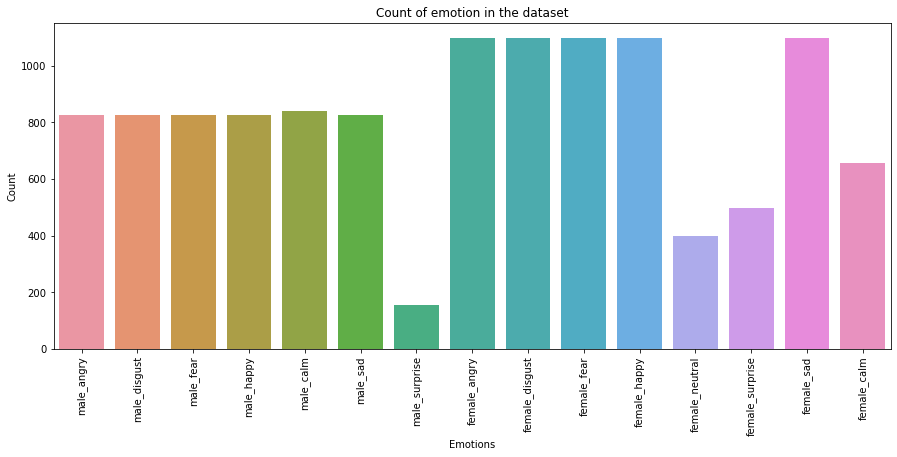

In [41]:
plt.figure(figsize=(15,6))
plt.title('Count of emotion in the dataset')
sns.countplot(combo_data.Emotion)
plt.ylabel('Count')
plt.xlabel('Emotions')
plt.xticks(rotation=90)
plt.show()

In [47]:
import random

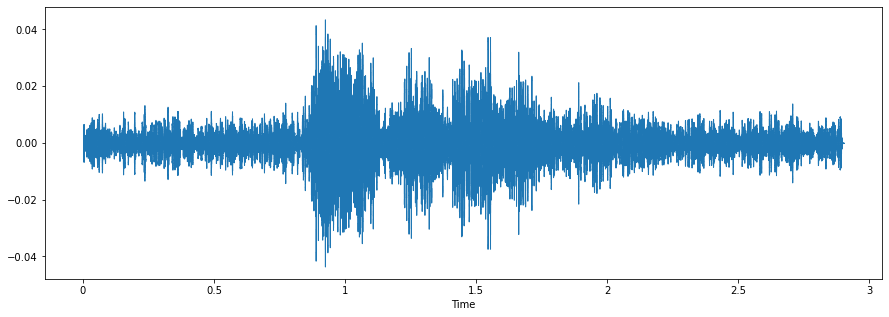

In [81]:
voice_rec = random.choice( combo_data['Path'] )
# voice_rec
data, sampling_rate = librosa.load(voice_rec)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(voice_rec)

MFCC 2 genders and emotions

-------------Female happy voice---------------


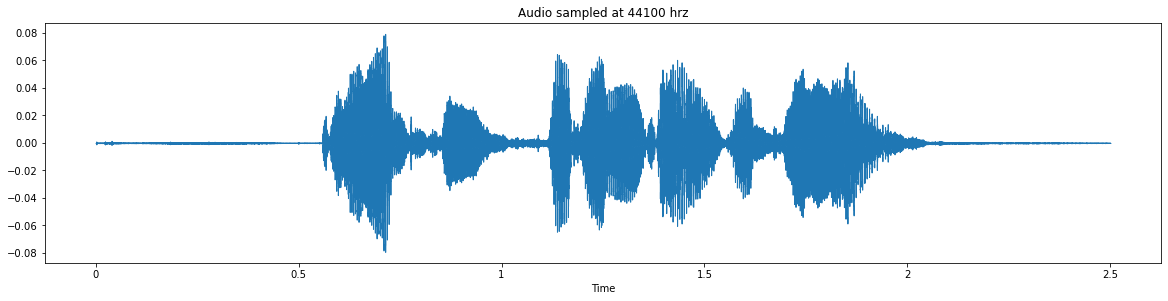

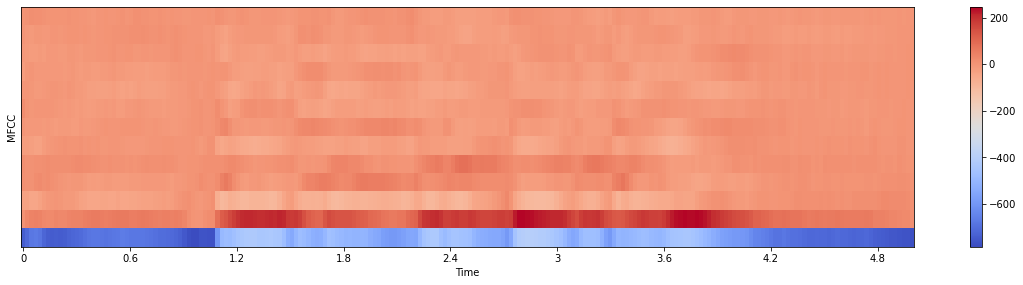

In [115]:
audio_path = "../SER/SER-Ravdess-data/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(audio_path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
print("-------------Female happy voice---------------")
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(audio_path)


-------------Male happy voice---------------


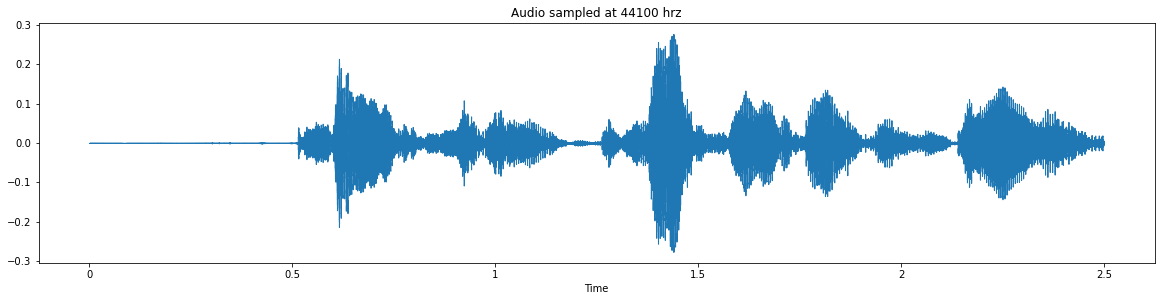

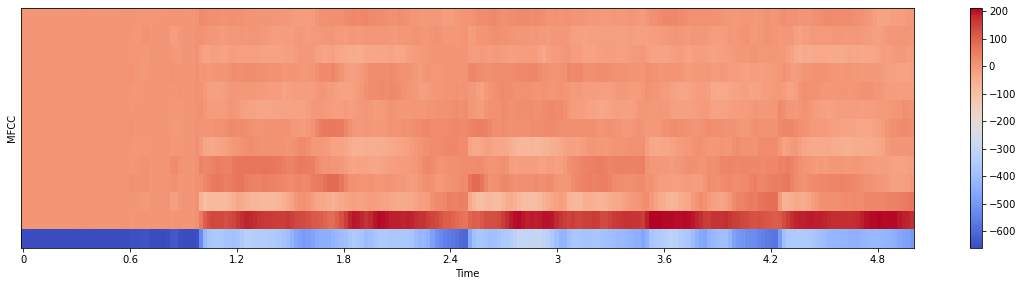

In [116]:
audio_path ="../SER/SER-Ravdess-data/Actor_11/03-01-03-02-01-01-11.wav"
X, sample_rate = librosa.load(audio_path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
print("-------------Male happy voice---------------")
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(audio_path)

-------------Female angry voice---------------


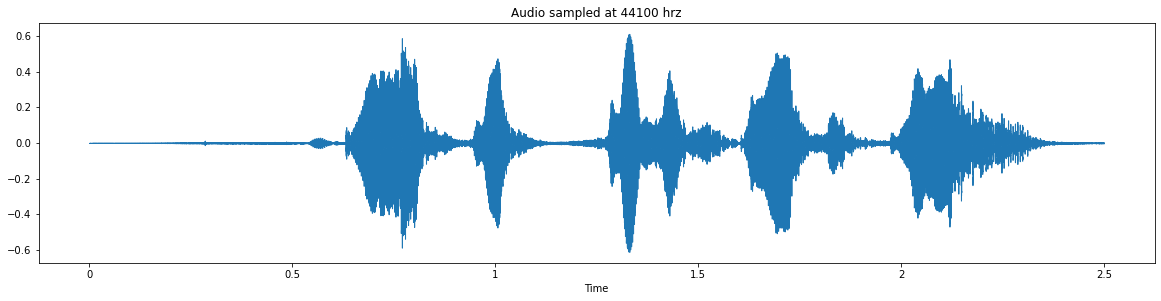

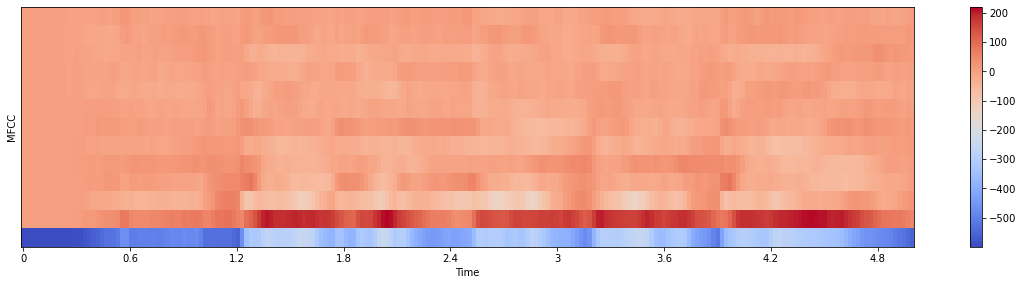

In [117]:
audio_path= "../SER/SER-Ravdess-data/Actor_12/03-01-05-02-02-02-12.wav"
X, sample_rate = librosa.load(audio_path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
print("-------------Female angry voice---------------")
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(audio_path)

-------------Male angry voice---------------


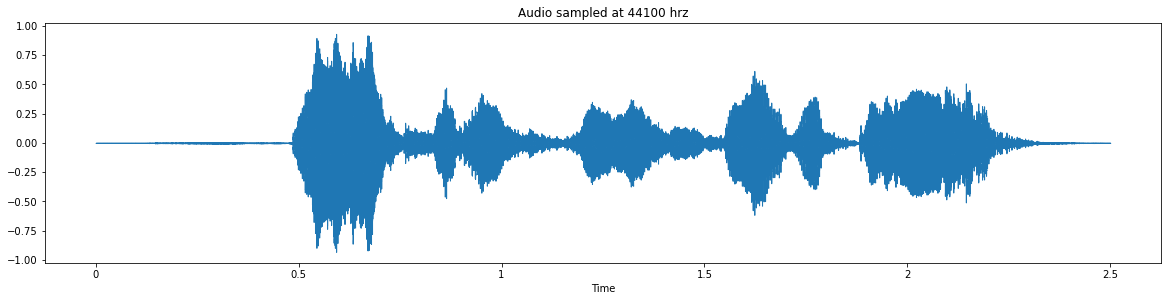

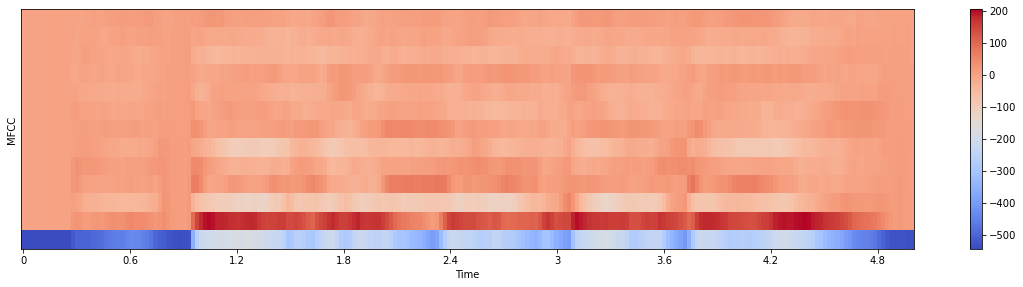

In [118]:
audio_path= "../SER/SER-Ravdess-data/Actor_11/03-01-05-02-02-02-11.wav"
X, sample_rate = librosa.load(audio_path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
print("-------------Male angry voice---------------")
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(audio_path)

In [18]:
sound, saamplerate = librosa.load(f'{file_path}/Actor_01/03-01-01-01-01-01-01.wav')

In [19]:
print('Vibration sequence:', sound)
array_len =sound.shape
print('Sound shape:', array_len)
print('Sample Rate (Hz):',saamplerate)

print('Length of Audio:', array_len[0]/saamplerate)

Vibration sequence: [0. 0. 0. ... 0. 0. 0.]
Sound shape: (72839,)
Sample Rate (Hz): 22050
Length of Audio: 3.3033560090702947


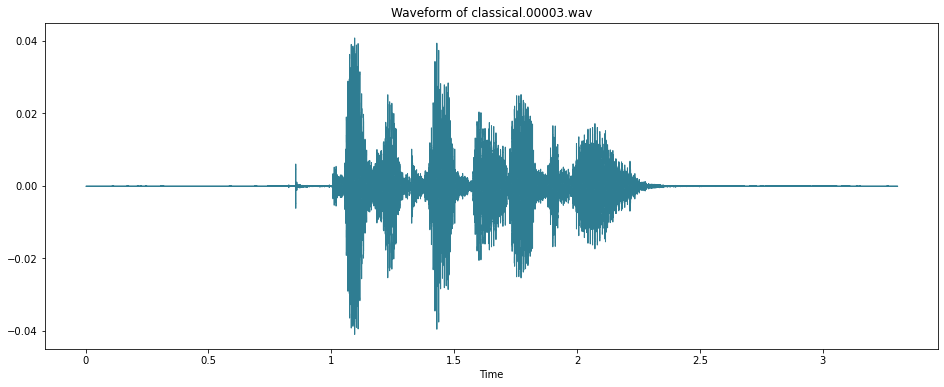

In [20]:
plt.figure(figsize=(16, 6))
librosa.display.waveshow(y=sound, sr=saamplerate, color="#2f7d92ff")
plt.title("Waveform of classical.00003.wav", fontsize=12)  
plt.show()

In [21]:
# Extracting feature; mfcc, chroma, mel

#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with sf.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
                    mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
                    result=np.hstack((result, mel))
        return result

In [22]:
# Defining emotions in the dataset

emotions = {
    '01':'neutral',
    '02':'calm',
    '03':'happy',
    '04':'sad',
    '05':'angry',
    '06':'fearful',
    '07':'disgust',
    '08':'surprised'
}

observed_emotions =['calm','happy','fearful','disgust']

In [23]:
#Loading the data and extraxting the features for each sound file
def load_data(test_size=0.2):
    x,y = [],[]
    for file in glob.glob("../SER/SER-Ravdess-data/Actor_*/*.wav"):
        file_name = os.path.basename(file)
        emotion = emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature = extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
        # return train_test_split(np.array(x),y,test_size=test_size,random_state=9 )
        return y

In [24]:



load_data()

C:\Users\halle\AppData\Local\Temp\ipykernel_16216\1062277746.py:18: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


['calm']